In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch

In [2]:
CLIP_SIZE = 1024
NUM_CLASSES = 2
DEVICE = torch.device('cuda')

# Hanning Window Kernel

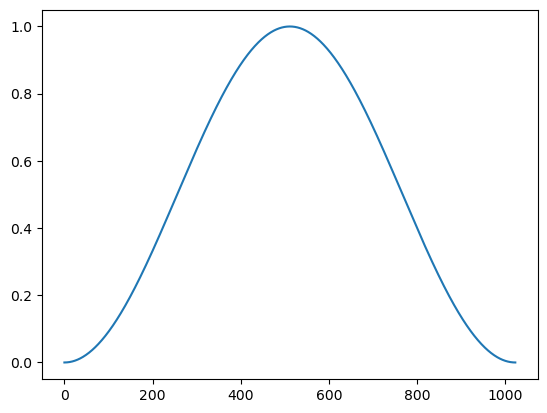

In [3]:
w_hann_i = 1 / 2 * np.array([1 - np.cos(2 * np.pi * i / (CLIP_SIZE - 1)) for i in range(CLIP_SIZE)])
plt.plot(w_hann_i)
plt.show()

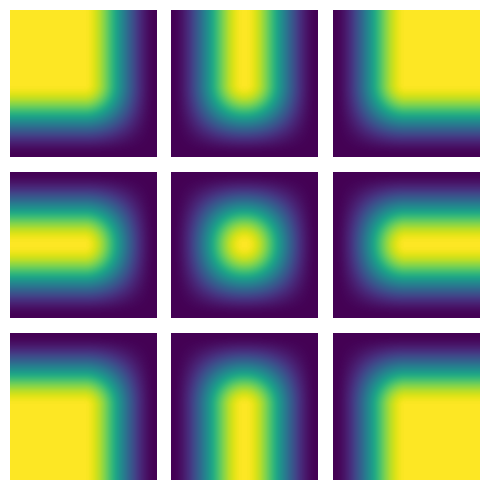

In [4]:
class HannKernel(torch.nn.Module):
    def __init__(self, size: int = 512, *, is_top: bool = False, is_bottom: bool = False, is_left: bool = False,
                 is_right: bool = False):
        super().__init__()
        wi = torch.cos((2 * torch.pi * torch.range(size)) / (size - 1)) / 2
        wj = wi.copy()

        if is_top:
            wi[:size // 2] = 1
        elif is_bottom:
            wi[size // 2:] = 1

        if is_left:
            wj[:size // 2] = 1
        elif is_right:
            wj[size // 2:] = 1

        self.kernel = wi.unsqueeze(1) @ wj.unsqueeze(0)

    def forward(self, x):
        return torch.mul(self.kernel, x)


def get_hann_kernel(size: int = 512, *, is_top: bool = False, is_bottom: bool = False, is_left: bool = False,
                    is_right: bool = False):
    assert not (is_top and is_bottom), "is_top and is_bottom are mutually exclusive"
    assert not (is_left and is_right), "is_left and is_right are mutually exclusive"

    wi = 1 / 2 * np.array([1 - np.cos(2 * np.pi * i / (size - 1)) for i in range(size)])
    wj = wi.copy()

    if is_top:
        wi[:size // 2] = 1
    elif is_bottom:
        wi[size // 2:] = 1

    if is_left:
        wj[:size // 2] = 1
    elif is_right:
        wj[size // 2:] = 1

    return torch.tensor(np.expand_dims(wi, axis=1) @ np.expand_dims(wj, axis=0), device=DEVICE)


nrows, ncols = 3, 3
figsize = (5, 5)
kernels = []

for is_top, is_bottom in [(True, False), (False, False), (False, True)]:
    for is_left, is_right in [(True, False), (False, False), (False, True)]:
        kernels.append(
            get_hann_kernel(size=CLIP_SIZE, is_top=is_top, is_bottom=is_bottom, is_left=is_left, is_right=is_right))

# create figure (fig), and array of axes (ax)
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)

# plot simple raster image on each sub-plot
for i, axi in enumerate(ax.flat):
    axi.imshow(kernels[i].detach().cpu())
    axi.axis('off')

plt.tight_layout()
plt.show()

# Bartlett-Hanning Kernel

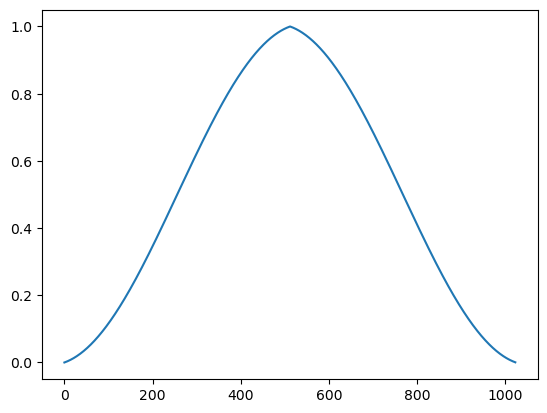

In [5]:
w_bartlett_hann_i = np.array(
    [0.62 - 0.48 * np.abs(i / CLIP_SIZE - 1 / 2.) + 0.38 * np.cos(2 * np.pi * np.abs(i / CLIP_SIZE - 1 / 2.)) for i in
     range(CLIP_SIZE)])
plt.plot(w_bartlett_hann_i)
plt.show()

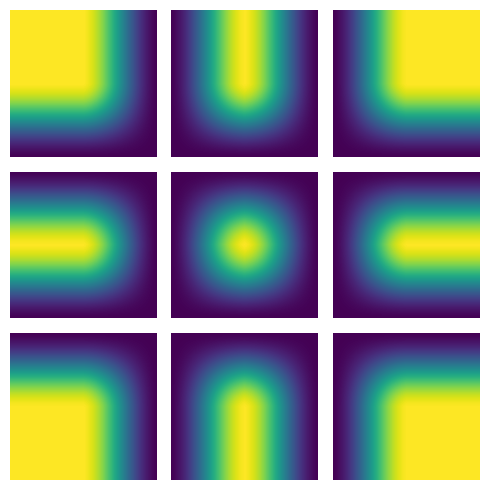

In [6]:
def get_bartlett_hann_kernel(size: int = 512, *, is_top: bool = False, is_bottom: bool = False, is_left: bool = False,
                             is_right: bool = False):
    assert not (is_top and is_bottom), "is_top and is_bottom are mutually exclusive"
    assert not (is_left and is_right), "is_left and is_right are mutually exclusive"

    wi = np.array(
        [0.62 - 0.48 * np.abs(i / size - 1 / 2.) + 0.38 * np.cos(2 * np.pi * np.abs(i / size - 1 / 2.)) for i in
         range(size)])
    wj = wi.copy()

    if is_top:
        wi[:size // 2] = 1
    elif is_bottom:
        wi[size // 2:] = 1

    if is_left:
        wj[:size // 2] = 1
    elif is_right:
        wj[size // 2:] = 1

    return torch.tensor(np.expand_dims(wi, axis=1) @ np.expand_dims(wj, axis=0), device=DEVICE)


nrows, ncols = 3, 3
figsize = (5, 5)
kernels = []

for is_top, is_bottom in [(True, False), (False, False), (False, True)]:
    for is_left, is_right in [(True, False), (False, False), (False, True)]:
        kernels.append(get_bartlett_hann_kernel(size=CLIP_SIZE, is_top=is_top, is_bottom=is_bottom, is_left=is_left,
                                                is_right=is_right))

# create figure (fig), and array of axes (ax)
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)

# plot simple raster image on each sub-plot
for i, axi in enumerate(ax.flat):
    axi.imshow(kernels[i].detach().cpu())
    axi.axis('off')

plt.tight_layout()
plt.show()

# Triangular Kernel

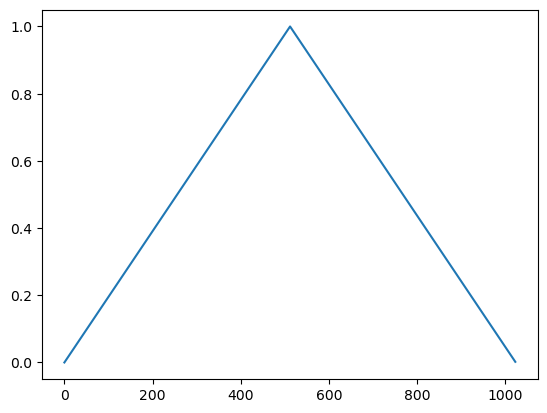

In [7]:
w_triangular_i = np.array([1 - np.abs(2 * i / CLIP_SIZE - 1) for i in range(CLIP_SIZE)])
plt.plot(w_triangular_i)
plt.show()

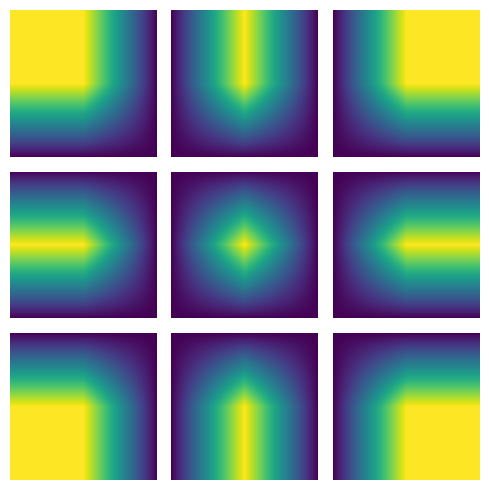

In [8]:
def get_triangular_kernel(size: int = 512, *, is_top: bool = False, is_bottom: bool = False, is_left: bool = False,
                          is_right: bool = False):
    assert not (is_top and is_bottom), "is_top and is_bottom are mutually exclusive"
    assert not (is_left and is_right), "is_left and is_right are mutually exclusive"

    wi = np.array(list(map(lambda i: 1 - np.abs(2 * i / size - 1), range(size))))
    wj = wi.copy()

    if is_top:
        wi[:size // 2] = 1
    elif is_bottom:
        wi[size // 2:] = 1

    if is_left:
        wj[:size // 2] = 1
    elif is_right:
        wj[size // 2:] = 1

    return torch.tensor(np.expand_dims(wi, axis=1) @ np.expand_dims(wj, axis=0), device=DEVICE)


nrows, ncols = 3, 3
figsize = (5, 5)
kernels = []

for is_top, is_bottom in [(True, False), (False, False), (False, True)]:
    for is_left, is_right in [(True, False), (False, False), (False, True)]:
        kernels.append(get_triangular_kernel(size=CLIP_SIZE, is_top=is_top, is_bottom=is_bottom, is_left=is_left,
                                             is_right=is_right))

# create figure (fig), and array of axes (ax)
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)

# plot simple raster image on each sub-plot
for i, axi in enumerate(ax.flat):
    axi.imshow(kernels[i].detach().cpu())
    axi.axis('off')

plt.tight_layout()
plt.show()

# Torch Module test

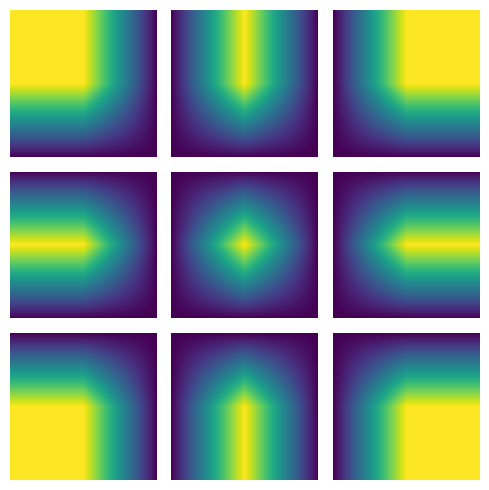

In [9]:
from hanning import TriangularKernel

nrows, ncols = 3, 3
figsize = (5, 5)
kernels = []

for top, bottom in [(True, False), (False, False), (False, True)]:
    for left, right in [(True, False), (False, False), (False, True)]:
        kernels.append(
            TriangularKernel(size=CLIP_SIZE, device=DEVICE).get_kernel(top=top, bottom=bottom, left=left, right=right))

# create figure (fig), and array of axes (ax)
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)

# plot simple raster image on each sub-plot
for i, axi in enumerate(ax.flat):
    axi.imshow(kernels[i].detach().cpu())
    axi.axis('off')

plt.tight_layout()
plt.show()